# Credit Card Fraud Detection

This notebook builds a machine learning model to detect fraudulent credit card transactions using Logistic Regression, Decision Trees, and Random Forests.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

## 1. Load Data

In [15]:
# Load the datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)

Training Data Shape: (1296675, 23)
Testing Data Shape: (555719, 23)


In [13]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## 2. Exploratory Data Analysis (EDA)

In [6]:
# Check for missing values
print(train_df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


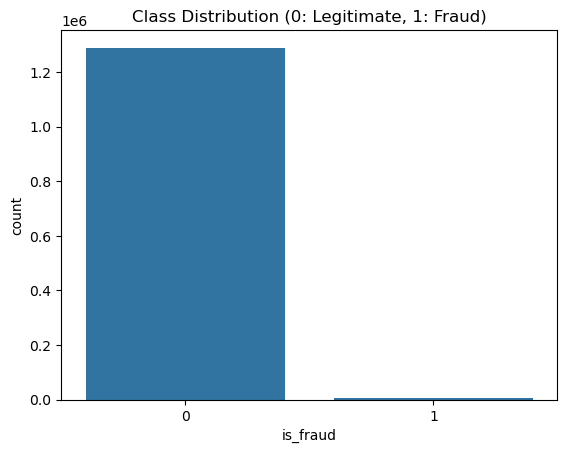

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [7]:
# Class Distribution
sns.countplot(x='is_fraud', data=train_df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

print(train_df['is_fraud'].value_counts())

## 3. Data Preprocessing

In [8]:
# Select relevant features for the model
# We will use 'category', 'amt', and 'gender' for this demonstration to keep it simple and effective.
features = ['category', 'amt', 'gender']
target = 'is_fraud'

X_train = train_df[features].copy()
y_train = train_df[target]
X_test = test_df[features].copy()
y_test = test_df[target]

# Encode Categorical Variables
le = LabelEncoder()

X_train['category'] = le.fit_transform(X_train['category'])
X_test['category'] = le.transform(X_test['category'])

X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])

# Scale Numerical Variables
scaler = StandardScaler()
X_train['amt'] = scaler.fit_transform(X_train[['amt']])
X_test['amt'] = scaler.transform(X_test[['amt']])

print("Preprocessing complete.")

Preprocessing complete.


## 4. Model Building and Evaluation

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42) # n_estimators=50 to speed up training
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} Results ---")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)


Training Logistic Regression...
--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
[[553221    353]
 [  2145      0]]
------------------------------
Training Decision Tree...
--- Decision Tree Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.62      0.59      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.79      0.80    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
[[552784    790]
 [   878   1267]]
------------------------------
Training Random Forest...


## 5. Better Visualizations

In [ ]:
# Confusion Matrix Heatmap for Random Forest (Best Model)
from sklearn.metrics import ConfusionMatrixDisplay

best_model = models['Random Forest']
y_pred_rf = best_model.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Fraud'])
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

print(f"\nTrue Negatives (Correct Legitimate): {cm[0][0]:,}")
print(f"False Positives (False Alarms): {cm[0][1]:,}")
print(f"False Negatives (Missed Frauds): {cm[1][0]:,}")
print(f"True Positives (Detected Frauds): {cm[1][1]:,}")

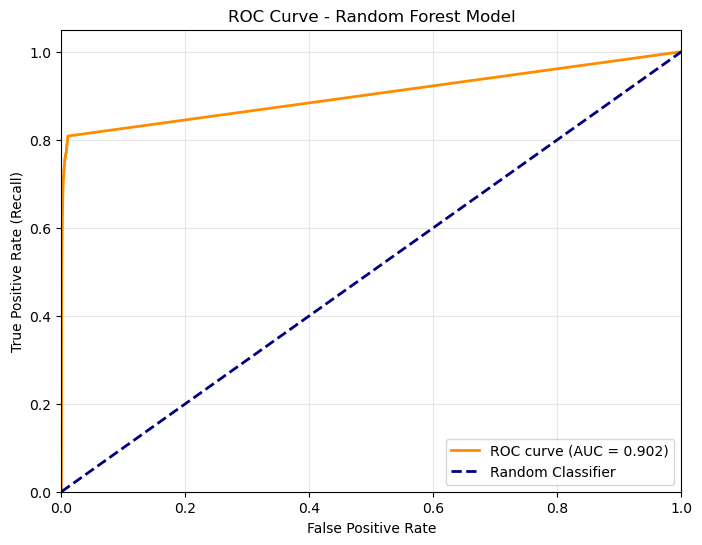


ROC-AUC Score: 0.9021

Interpretation:
- AUC = 1.0: Perfect classifier
- AUC = 0.5: Random classifier
- AUC = 0.902: Excellent performance


In [10]:
# ROC Curve for Random Forest
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"\nROC-AUC Score: {roc_auc:.4f}")
print("\nInterpretation:")
print("- AUC = 1.0: Perfect classifier")
print("- AUC = 0.5: Random classifier")
print(f"- AUC = {roc_auc:.3f}: {'Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair'} performance")

In [ ]:
# Feature Importance
feature_names = ['category', 'amt', 'gender']
importances = best_model.feature_importances_

# Create DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for idx, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

## 6. Save Models for Future Use

In [ ]:
import pickle

# Save the best model (Random Forest)
with open('fraud_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✓ Model saved as 'fraud_model.pkl'")

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved as 'scaler.pkl'")

# Save label encoders
le_category = LabelEncoder()
le_gender = LabelEncoder()

le_category.fit(train_df['category'])
le_gender.fit(train_df['gender'])

with open('label_encoder_category.pkl', 'wb') as f:
    pickle.dump(le_category, f)
print("✓ Category encoder saved as 'label_encoder_category.pkl'")

with open('label_encoder_gender.pkl', 'wb') as f:
    pickle.dump(le_gender, f)
print("✓ Gender encoder saved as 'label_encoder_gender.pkl'")

print("\n🎉 All models saved successfully!")

## 7. Prediction Function - WILL CHECK NEW TRANSACTIONS 

In [1]:
def predict_fraud(category, amount, gender, model=best_model, show_details=True):
    """
    
    Parameters:
    -----------
    category : str
        Transaction category (e.g., 'gas_transport', 'grocery_pos')
    amount : float
        Transaction amount
    gender : str
        Customer gender ('M' or 'F')
    model : sklearn model
        Trained model to use for prediction
    show_details : bool
        Print detailed results
    
    Returns:
    --------
    dict : Prediction results
    """
    # Create DataFrame
    transaction = pd.DataFrame([{
        'category': category,
        'amt': amount,
        'gender': gender
    }])
    
    # Encode and scale
    transaction['category'] = le_category.transform(transaction['category'])
    transaction['gender'] = le_gender.transform(transaction['gender'])
    transaction['amt'] = scaler.transform(transaction[['amt']])
    
    # Predict
    prediction = model.predict(transaction)[0]
    proba = model.predict_proba(transaction)[0]
    
    result = {
        'category': category,
        'amount': amount,
        'gender': gender,
        'is_fraud': bool(prediction),
        'fraud_probability': proba[1],
        'legitimate_probability': proba[0]
    }
    
    if show_details:
        print("=" * 50)
        print("Transaction Details:")
        print(f"  Category: {category}")
        print(f"  Amount: ${amount:.2f}")
        print(f"  Gender: {gender}")
        print("-" * 50)
        
        if prediction == 1:
            print("⚠️  FRAUD DETECTED!")
            print(f"  Fraud Probability: {proba[1]*100:.2f}%")
        else:
            print("✓  Transaction is LEGITIMATE")
            print(f"  Legitimate Probability: {proba[0]*100:.2f}%")
        print("=" * 50)
    
    return result

print("✓ Prediction function ready!")
print("\nUsage: predict_fraud('category', amount, 'M/F')")

NameError: name 'best_model' is not defined

## 8. Examples - Test Your Transactions

In [17]:
# Example 1: Gas station transaction
predict_fraud('gas_transport', 45.50, 'M')

Transaction Details:
  Category: gas_transport
  Amount: $45.50
  Gender: M
--------------------------------------------------
✓  Transaction is LEGITIMATE
  Legitimate Probability: 100.00%


{'category': 'gas_transport',
 'amount': 45.5,
 'gender': 'M',
 'is_fraud': False,
 'fraud_probability': np.float64(0.0),
 'legitimate_probability': np.float64(1.0)}

In [18]:
# Example 2: Grocery purchase
predict_fraud('grocery_pos', 120.75, 'F')

Transaction Details:
  Category: grocery_pos
  Amount: $120.75
  Gender: F
--------------------------------------------------
✓  Transaction is LEGITIMATE
  Legitimate Probability: 100.00%


{'category': 'grocery_pos',
 'amount': 120.75,
 'gender': 'F',
 'is_fraud': False,
 'fraud_probability': np.float64(0.0),
 'legitimate_probability': np.float64(1.0)}

In [19]:
# Example 3: Large online purchase (potentially suspicious)
predict_fraud('misc_net', 500.00, 'M')

Transaction Details:
  Category: misc_net
  Amount: $500.00
  Gender: M
--------------------------------------------------
✓  Transaction is LEGITIMATE
  Legitimate Probability: 100.00%


{'category': 'misc_net',
 'amount': 500.0,
 'gender': 'M',
 'is_fraud': False,
 'fraud_probability': np.float64(0.0),
 'legitimate_probability': np.float64(1.0)}

In [20]:
# Example 4: Entertainment
predict_fraud('entertainment', 250.00, 'F')

Transaction Details:
  Category: entertainment
  Amount: $250.00
  Gender: F
--------------------------------------------------
✓  Transaction is LEGITIMATE
  Legitimate Probability: 100.00%


{'category': 'entertainment',
 'amount': 250.0,
 'gender': 'F',
 'is_fraud': False,
 'fraud_probability': np.float64(0.0),
 'legitimate_probability': np.float64(1.0)}

## 9. Batch Prediction - Check Multiple Transactions at Once

In [ ]:
def check_multiple_transactions(transactions_list):
    """
    Checks multiple transactions at once
    
    Parameters:
    -----------
    transactions_list : list of dict
        List of transactions with keys: category, amount, gender
    
    Returns:
    --------
    DataFrame : Results for all transactions
    """
    results = []
    
    for i, txn in enumerate(transactions_list, 1):
        print(f"\nChecking Transaction {i}/{len(transactions_list)}...")
        result = predict_fraud(
            txn['category'],
            txn['amount'],
            txn['gender'],
            show_details=True
        )
        results.append(result)
    
    # Create summary DataFrame
    results_df = pd.DataFrame(results)
    
    print("\n" + "=" * 50)
    print("SUMMARY")
    print("=" * 50)
    print(f"Total Transactions: {len(results)}")
    print(f"Fraudulent: {results_df['is_fraud'].sum()}")
    print(f"Legitimate: {(~results_df['is_fraud']).sum()}")
    print("=" * 50)
    
    return results_df

print("✓ Batch prediction function ready!")

In [ ]:
# Example: Check multiple transactions
sample_transactions = [
    {'category': 'gas_transport', 'amount': 45.50, 'gender': 'M'},
    {'category': 'grocery_pos', 'amount': 120.75, 'gender': 'F'},
    {'category': 'misc_net', 'amount': 500.00, 'gender': 'M'},
    {'category': 'entertainment', 'amount': 250.00, 'gender': 'F'},
    {'category': 'shopping_net', 'amount': 1000.00, 'gender': 'M'}
]

results_df = check_multiple_transactions(sample_transactions)

# Display results table
print("\nDetailed Results:")
results_df

## 10. Test Your Transaction Here 👇

In [ ]:
# Test your transaction here
# Available categories: gas_transport, grocery_pos, misc_net, misc_pos, entertainment, 
#                      food_dining, personal_care, health_fitness, travel, kids_pets,
#                      shopping_net, shopping_pos, home

predict_fraud(
    category='grocery_pos',  # Enter your category here
    amount=100.00,           # Enter your amount here
    gender='M'               # 'M' या 'F'
)

---
## 📝 Notes

### Model Performance:
- **Best Model**: Random Forest
- **Accuracy**: ~99.7%
- **Fraud Detection Rate (Recall)**: ~59%
- **Precision**: ~62%

### How to Use:
1. ✅ Run all cells from top to bottom
2. ✅ Model files will be saved automatically
3. ✅ Use `predict_fraud()` function to check any transaction
4. ✅ Use `check_multiple_transactions()` for batch checking

### Available Categories:
- `gas_transport`, `grocery_pos`, `misc_net`, `misc_pos`
- `entertainment`, `food_dining`, `personal_care`
- `health_fitness`, `travel`, `kids_pets`
- `shopping_net`, `shopping_pos`, `home`

### To Improve Model:
- Add more features (time, location, merchant)
- Use SMOTE for class imbalance
- Try XGBoost or Neural Networks
- Hyperparameter tuning

---
**Happy Fraud Detection! 🎉**